In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
#from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from collections import Counter
import sqlite3

In [2]:
# Load the data
file_path = 'books.csv'
df = pd.read_csv(file_path, error_bad_lines = False)
df.head()

/Users/yuriihanley/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
# create a random column for genre
df['randNumCol'] = np.random.randint(0,5, size=len(df))

In [4]:
# create a random column for gender
df['randNumCol2'] = np.random.randint(0,2, size=len(df))


In [5]:
# create a random column for age
df['randNumCol3'] = np.random.randint(18,80, size=len(df))


In [6]:
df.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,randNumCol,randNumCol2,randNumCol3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,1,1,32
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,1,1,45
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,4,1,68
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4,0,48
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,2,1,44
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,0976540606,9780976540601,en-US,152,19,1,4/26/2005,Nimble Books,3,0,55
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,4,1,21
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3628,254,11/1/2005,Gramercy Books,4,1,73
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,0345453743,9780345453747,eng,815,249558,4080,4/30/2002,Del Rey Books,0,1,75
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400052929,eng,215,4930,460,8/3/2004,Crown,1,0,32


In [7]:
## replace column name with gender
df["randNumCol2"].replace({0: "M", 1: "F"}, inplace=True)


In [8]:
## replace randnumcol with genre

df["randNumCol"].replace({0: "Adventure", 1: "Non-Fiction", 2:"Thriller", 3:"Romance", 4: "Fiction", 5:"Sci-Fi"}, inplace=True)

In [9]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,randNumCol,randNumCol2,randNumCol3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Non-Fiction,F,32
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Non-Fiction,F,45
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,Fiction,F,68
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fiction,M,48
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Thriller,F,44


In [19]:
## change column name of random number to genre column
df.rename(columns = {'randNumCol' : 'genre', 'randNumCol2': 'gender', 'randNumCol3': 'age'}, inplace = True)
df.head()
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,age
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099,48.874944
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589,17.954575
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,18.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,33.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000,49.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000,65.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,79.000000


In [11]:
## read df to csv file to import into tableau
df.to_csv('books_added_features.csv')

In [12]:
#  1. Get the total books for each genre

genre_count = df.groupby(["genre"]).count()["bookID"]
genre_count

genre
Adventure      2205
Fiction        2216
Non-Fiction    2283
Romance        2286
Thriller       2133
Name: bookID, dtype: int64

In [13]:
# 2. Get avg rating for each genre

genre_total_avg_rating = df.groupby(["genre"]).sum()["average_rating"]
genre_total_avg_rating

genre
Adventure      8692.02
Fiction        8709.97
Non-Fiction    8984.01
Romance        8970.85
Thriller       8401.87
Name: average_rating, dtype: float64

In [14]:
#  1. Get the total books for each gender

gender_count = df.groupby(["gender"]).count()["bookID"]
gender_count

gender
F    5502
M    5621
Name: bookID, dtype: int64

<BarContainer object of 5 artists>

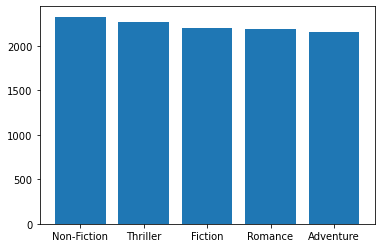

In [15]:
import matplotlib.pyplot as plt

# Set the x-axis to a list of strings for each month.
x_axis = ["Non-Fiction", "Thriller", "Fiction", "Romance", "Adventure"]

# Set the y-axis to a list of floats as the total fare in US dollars accumulated for each month.
y_axis = [2326, 2263, 2196, 2185, 2155]

# Create the plot
plt.bar(x_axis, y_axis)

In [ ]:
# # 6. Create a summary DataFrame with all the data gathered from Steps 1-5
# books_summary_df = pd.DataFrame(
#         {
#         "genre count": genre_count, 
#         "gender count": gender_count, 
#         "genre_total_avg_rating ": genre_total_avg_rating
# })


In [23]:
## Only want books with at least 80% of the average number of ratings
df = df.loc[df['ratings_count'] >= 17942.85*.8]
## Sorting remaing books by average rating
df = df.sort_values(by = 'average_rating', ascending = False)
df.head(10)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,gender,age
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,Adventure,F,69
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Thriller,F,44
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,Adventure,M,77
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,Fiction,F,21
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,0836217691,9780836217698,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing,Thriller,F,25
6591,24818,The Days Are Just Packed,Bill Watterson,4.69,0836217357,9780836217353,eng,176,20308,244,9/1/1993,Andrews McMeel Publishing,Adventure,F,22
6294,23753,The Absolute Sandman Volume One,Neil Gaiman/Mike Dringenberg/Chris Bachalo/Mic...,4.65,1401210821,9781401210823,eng,612,15640,512,11/1/2006,Vertigo,Adventure,M,38
6588,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,0836204387,9780836204384,eng,208,49122,368,9/5/1995,Andrews McMeel Publishing,Non-Fiction,F,48
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books,Fiction,M,31
72,119,The Lord of the Rings: The Art of the Fellowsh...,Gary Russell,4.59,0618212906,9780618212903,eng,192,26153,102,6/12/2002,Houghton Mifflin Harcourt,Fiction,M,23


In [31]:
##Starting to make the rec system

v = df["ratings_count"]
R = df["average_rating"]
m = 17942.85*.8
C = 3.934075

#Weighted Average
df["weighted values"] = v/(v+m)*R + (m/(v+m))*C
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,gender,age,weighted values
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,Adventure,F,69,4.546915
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Thriller,F,44,4.562321
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,Adventure,M,77,4.449883
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,Fiction,F,21,4.461786
6590,24816,Homicidal Psycho Jungle Cat (Calvin and Hobbes...,Bill Watterson,4.72,0836217691,9780836217698,eng,176,15365,290,9/6/1994,Andrews McMeel Publishing,Thriller,F,25,4.340402


In [35]:
df = df.sort_values(by='weighted values',ascending=False)
df.head(25)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,genre,gender,age,weighted values
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Non-Fiction,F,32,4.565674
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,Thriller,F,44,4.562321
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,Fiction,M,48,4.556183
6587,24812,The Complete Calvin and Hobbes,Bill Watterson,4.82,0740748475,9780740748479,eng,1456,32213,930,9/6/2005,Andrews McMeel Publishing,Adventure,F,69,4.546915
21,30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,0345538374,9780345538376,eng,1728,101233,1550,9/25/2012,Ballantine Books,Fiction,M,31,4.508544
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Non-Fiction,F,45,4.486318
4244,15195,The Complete Maus,Art Spiegelman,4.55,0141014083,9780141014081,eng,296,111475,5966,10/2/2003,Penguin Books,Romance,F,58,4.479737
6588,24813,The Calvin and Hobbes Tenth Anniversary Book,Bill Watterson,4.63,0836204387,9780836204384,eng,208,49122,368,9/5/1995,Andrews McMeel Publishing,Non-Fiction,F,48,4.472626
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,28242,808,9/12/2005,Scholastic,Fiction,F,21,4.461786
6589,24814,It's a Magical World (Calvin and Hobbes #11),Bill Watterson,4.76,0836221362,9780836221367,eng,176,23875,303,9/1/1996,Andrews McMeel Publishing,Adventure,M,77,4.449883
